In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
original_Dataset = pd.read_csv("https://raw.githubusercontent.com/ritikumra/Titanic-ML-Model/main/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/ritikumra/Titanic-ML-Model/main/test.csv")
test_survived = pd.read_csv("https://raw.githubusercontent.com/ritikumra/Titanic-ML-Model/main/gender_submission.csv")
test = pd.merge(test_df, test_survived, on='PassengerId')
original_Dataset = pd.concat([original_Dataset,test])
original_Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [221]:
original_Dataset = original_Dataset.dropna()
original_Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [222]:
y = original_Dataset["Survived"]
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
404,0
405,0
407,0
411,1


In [223]:
independent_variables = original_Dataset.drop(['Survived','Name','Ticket','Embarked','Cabin'], axis = 1)
independent_variables

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,female,38.0,1,0,71.2833
3,4,1,female,35.0,1,0,53.1000
6,7,1,male,54.0,0,0,51.8625
10,11,3,female,4.0,1,1,16.7000
11,12,1,female,58.0,0,0,26.5500
...,...,...,...,...,...,...,...
404,1296,1,male,43.0,1,0,27.7208
405,1297,2,male,20.0,0,0,13.8625
407,1299,1,male,50.0,1,1,211.5000
411,1303,1,female,37.0,1,0,90.0000


In [224]:
independent_variables.dtypes

,0
PassengerId,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64


In [225]:
independent_variables.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [226]:
encoder = OneHotEncoder(sparse_output=False)
categorical_column = independent_variables[['Sex']]
one_hot_encoded = encoder.fit_transform(categorical_column)
one_hot_encoded
one_hot_df = pd.DataFrame(one_hot_encoded, columns=['Encoded Female', 'Encoded Male'])
one_hot_df



,Encoded Female,Encoded Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
265,0.0,1.0
266,0.0,1.0
267,0.0,1.0
268,1.0,0.0


In [227]:
one_hot_df.reset_index(drop=True, inplace=True)
independent_variables.reset_index(drop=True, inplace=True)
merged_df = pd.concat([independent_variables,one_hot_df ], axis=1)
merged_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Encoded Female,Encoded Male
0,2,1,female,38.0,1,0,71.2833,1.0,0.0
1,4,1,female,35.0,1,0,53.1000,1.0,0.0
2,7,1,male,54.0,0,0,51.8625,0.0,1.0
3,11,3,female,4.0,1,1,16.7000,1.0,0.0
4,12,1,female,58.0,0,0,26.5500,1.0,0.0
...,...,...,...,...,...,...,...,...,...
265,1296,1,male,43.0,1,0,27.7208,0.0,1.0
266,1297,2,male,20.0,0,0,13.8625,0.0,1.0
267,1299,1,male,50.0,1,1,211.5000,0.0,1.0
268,1303,1,female,37.0,1,0,90.0000,1.0,0.0


In [228]:

x = merged_df.drop(['Sex', 'PassengerId'], axis = 1)
x

,Pclass,Age,SibSp,Parch,Fare,Encoded Female,Encoded Male
0,1,38.0,1,0,71.2833,1.0,0.0
1,1,35.0,1,0,53.1000,1.0,0.0
2,1,54.0,0,0,51.8625,0.0,1.0
3,3,4.0,1,1,16.7000,1.0,0.0
4,1,58.0,0,0,26.5500,1.0,0.0
...,...,...,...,...,...,...,...
265,1,43.0,1,0,27.7208,0.0,1.0
266,2,20.0,0,0,13.8625,0.0,1.0
267,1,50.0,1,1,211.5000,0.0,1.0
268,1,37.0,1,0,90.0000,1.0,0.0


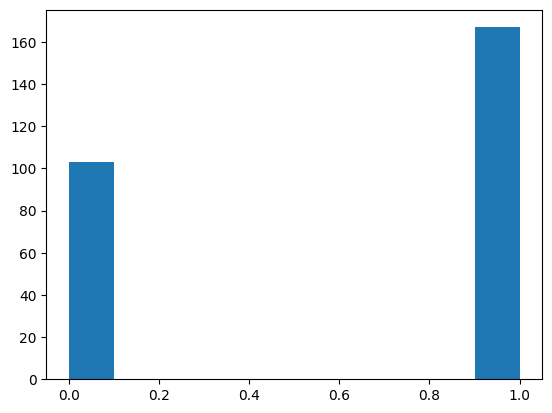

In [229]:

plt.hist(y)
plt.show()

In [230]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 100)

In [231]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Encoded Female,Encoded Male
213,1,53.0,0,0,28.5000,0.0,1.0
124,1,40.0,0,0,153.4625,1.0,0.0
221,1,64.0,0,2,83.1583,1.0,0.0
32,1,44.0,0,0,27.7208,1.0,0.0
254,1,59.0,2,0,51.4792,1.0,0.0
...,...,...,...,...,...,...,...
226,1,47.0,1,0,227.5250,0.0,1.0
66,1,38.0,0,1,153.4625,0.0,1.0
53,1,2.0,1,2,151.5500,1.0,0.0
79,1,23.0,1,0,113.2750,1.0,0.0


In [232]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Encoded Female,Encoded Male
69,1,45.0,0,0,35.5000,0.0,1.0
196,1,13.0,2,2,262.3750,0.0,1.0
235,1,41.0,1,0,51.8625,0.0,1.0
59,1,18.0,2,2,262.3750,1.0,0.0
101,1,16.0,0,0,86.5000,1.0,0.0
117,1,39.0,1,0,55.9000,1.0,0.0
85,1,14.0,1,2,120.0000,1.0,0.0
229,1,50.0,1,1,211.5000,1.0,0.0
103,1,36.0,0,0,26.2875,0.0,1.0
262,1,18.0,1,0,60.0000,1.0,0.0


In [233]:
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
404,0
405,0
407,0
411,1


***Linear Regression***

In [234]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [235]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [236]:
y_lr_test_pred

array([0.28984312, 0.4434141 , 0.32352515, 1.06045645, 1.03535674,
       0.96496122, 1.01308984, 0.95075654, 0.31662351, 1.03559293,
       0.97177541, 0.28799766, 0.29175598, 1.00347366, 0.34083262,
       0.33116902, 0.3199248 , 0.30955081, 0.33712407, 0.33633979,
       0.35081769, 0.95505633, 0.29918692, 0.26315575, 0.20647725,
       0.9225585 , 0.35658183, 1.00111008, 0.99888233, 1.0509795 ,
       0.95597303, 0.94408888, 1.03548336, 0.80934346, 0.24146544,
       1.01103351, 0.39923192, 0.28273363, 0.34861856, 0.93236426,
       0.35067075, 0.91526362, 0.29505412, 1.02448776, 0.34091381,
       0.24968092, 0.24228181, 0.90472581, 1.03793968, 0.34311738,
       0.91528422, 0.35146576, 0.3952944 , 0.33675897])

In [237]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse= mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2= r2_score(y_train, y_lr_train_pred)

lr_test_mse= mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2= r2_score(y_test, y_lr_test_pred)

In [238]:

print('LR MSE (Train):' , lr_train_mse)
print('LR R2 (Train):' , lr_train_r2)
print('LR MSE (Test):' , lr_test_mse)
print('LR R2 (Test):' , lr_test_r2)

LR MSE (Train): 0.12451778867937348
LR R2 (Train): 0.4660384238396279
LR MSE (Test): 0.12389693282345228
LR R2 (Test): 0.4932910853952498


Text(0.5, 0, ' Actually Survived')

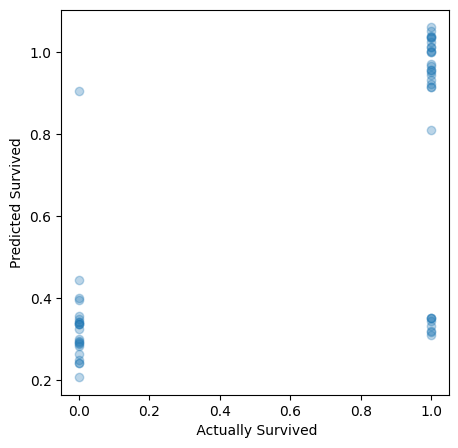

In [239]:
plt.figure(figsize=(5,5))
plt.scatter(x= y_test, y= y_lr_test_pred, alpha= 0.3)

plt.plot()
plt.ylabel('Predicted Survived')
plt.xlabel(' Actually Survived')

In [241]:
Predicted_vs_Actual = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_lr_test_pred})
Predicted_vs_Actual['Predicted Value'] = np.round(Predicted_vs_Actual['Predicted Value']).astype(int)
Predicted_vs_Actual

,Actual Value,Predicted Value
339,0,0
64,0,0
245,0,0
311,1,1
504,1,1
577,1,1
435,1,1
218,1,1
512,1,0
395,1,1


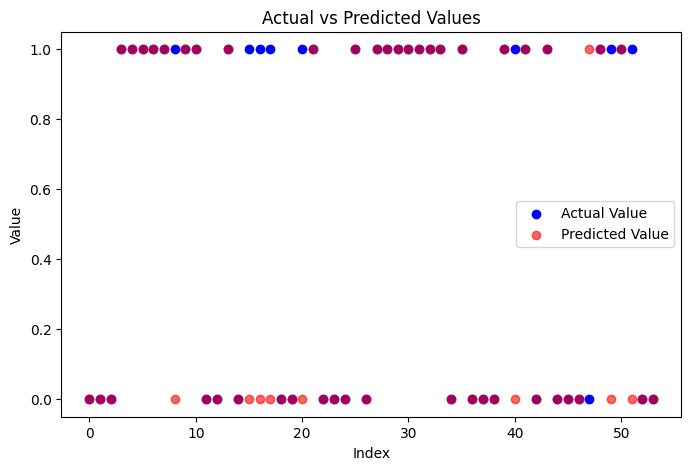

In [245]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), Predicted_vs_Actual['Actual Value'], label='Actual Value', color='blue')
plt.scatter(range(len(y_lr_test_pred)), Predicted_vs_Actual['Predicted Value'], label='Predicted Value', color='red', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()